In [1]:
import numpy as np

In [12]:
X = 2*np.random.rand(100,1) # 0에서 2 사이 로 만들려고 곱하기함 

In [13]:
y = 4+3*X+np.random.rand(100,1) # y = 4+3X + 입실론 (입실론~u(0,1))

## 회귀계수 추청

In [7]:
# 정규방정식
# b=(X^(T)*X)^(-1)X^(T)*y

In [9]:
X_b=np.c_[np.ones((100,1)),X] #[np.ones((100,1)): 1인 벡터를 만든다. 
# np.c_은 1인 벡터와 엑스를 합한다. 하나의 배열로 만든다.

In [14]:
# optimal beta
theta_beta=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [15]:
theta_beta # 회귀계수 

array([[4.42425783],
       [3.0442675 ]])

#### 추정된 회귀식
    
y=4.42425783+3.0442675*X

### 예측 y= X_new*theta_beta (y값을 예측)

In [2]:
X_new=np.array([[0],[2]]) # 1*2 / testing data

In [3]:
X_new

array([[0],
       [2]])

In [7]:
X_new_b=np.c_[np.ones((2,1)),X_new] # 2*1

In [8]:
X_new_b

array([[1., 0.],
       [1., 2.]])

In [18]:
y_predict=X_new_b.dot(theta_beta)

In [19]:
y_predict

array([[ 4.42425783],
       [10.51279282]])

In [20]:
import matplotlib.pyplot as plt

[0, 2, 2, 15]

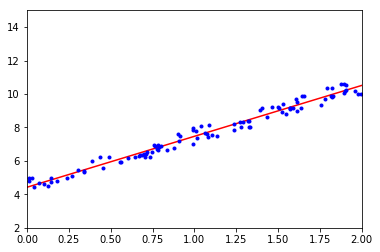

In [24]:
plt.plot(X_new,y_predict,'r-')# 새로운 데이터의 예측값 
plt.plot(X,y,'b.')
plt.axis([0,2,2,15]) # plot 을 확대할 수 있다. 구간을 설정해서 
# 0,2 x값의 범위 ,2,15 y값의 범위 

### sklearn 이용하기 

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression() # 객체 생성 

In [14]:
lin_reg.fit(X,y) # 회귀계수를 추정 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
lin_reg.intercept_ 

array([4.42362517])

In [16]:
lin_reg.coef_ 

array([[3.06967654]])

In [17]:
lin_reg.predict(X_new)

array([[ 4.42362517],
       [10.56297824]])

## Gradient descent 경사하강법
- 최적의 하이퍼파라미터를 찾기 위한 과정

In [10]:
eta=0.1 # step size
n_iteration=1000 # iteration 수/ 학습수 =i
m=100 # sample 수 

In [12]:
# 데이터 생성
import numpy as np
X = 2*np.random.rand(100,1) # 100개의 input 데이터 생성 (0과 1사이에=rand)
y = 4+3*X+np.random.rand(100,1) # y = 4+3X + 입실론 (입실론~u(0,1))
X_b=np.c_[np.ones((100,1)),X] #[np.ones((100,1)): 1인 벡터를 만든다. 

In [5]:
theta = np.random.randn(2,1) # initialization 초기화 
# randn : 표준정규분포 가정해서 생성한 난수 (2,1): 2-by-1 벡터  생성 

In [6]:
theta

array([[0.9567615 ],
       [0.78233399]])

In [8]:
for iteration in range(n_iteration):
    gradient = 2/m*X_b.T.dot(X_b.dot(theta)-y) # gradient
    theta= theta-eta*gradient # updating theta

In [9]:
theta # Gradient descent 이용한 값 

array([[4.35755841],
       [3.08025402]])

#### 정규방정식 값    
    array([[4.42425783],
           [3.0442675 ]])

## 확률적 경사하강법

In [2]:
n_epochs=50 # 에폭 수 
t0,t1 = 5,50

In [4]:
def learning_rate(t): # eta=5/(t+50)
    return t0/(t+t1)

In [7]:
theta = np.random.randn(2,1) # 모수 초기화

In [8]:
theta

array([[-0.31709369],
       [ 1.23064329]])

In [13]:
for epoch in range(n_epochs): # 50번 반복 SGD
    for i in range(m): # 샘플 수 만큼 반복
        random_index = np.random.randint(m) # 임의의 샘플 선택
        xi=X_b[random_index:random_index+1] # X_b random_index 에 해당하는 샘플을 선택
        yi=y[random_index:random_index+1] # y 벡터에서 random_index 에 해당하는 샘플을 선택
        gradients=2*xi.T.dot(xi.dot(theta)-yi) # gradient 계산
        eta = learning_rate(epoch*m+i) # learning rate update
        theta = theta-eta*gradients
        

In [14]:
theta

array([[4.44003296],
       [3.06071986]])

## 미니배치 경사하강법

In [15]:
n_epochs=50 # 에폭 수 
t0,t1 = 5,50
minibatch_size=20 # 미니 배치 사이즈

In [16]:
def learning_rate(t): #eta=5/(t+50)
    return t0/(t+t1)

In [17]:
np.random.permutation(m)

array([68, 97, 23, 13, 36,  4, 34, 88, 90,  0, 78, 84, 40, 39, 91, 28, 15,
       64, 89,  9, 56, 77,  6, 98, 93, 79, 43, 14, 46, 17, 60, 48,  8, 86,
       18, 21, 94, 81, 31, 30, 67, 71, 69, 55, 20, 52, 75, 32,  2, 80, 24,
       63, 47, 33, 38, 87, 10, 57,  5, 70, 62,  1, 95, 42, 74, 92,  3,  7,
       45, 37, 22, 49, 19, 85, 65, 99, 27, 12, 66, 82, 58, 72, 25, 41, 44,
       50, 51, 73, 35, 83, 76, 53, 61, 29, 54, 16, 26, 96, 11, 59])

In [18]:
t=0
for epoch in range(n_epochs): # 50번 반복
    shuffled_indices=np.random.permutation(m) # 데이터를 임의로 섞음 
    X_shuffled=X_b[shuffled_indices] # X_b 를 shuffled_indices에 섞음 
    y_shuffled=y[shuffled_indices] # y 를 shuffled_indices에 섞음 
    for i in range(0,m,minibatch_size): # 0,20,40,60,80
        t+=1
        xi=X_shuffled[i:i+minibatch_size]
        yi=y_shuffled[i:i+minibatch_size]
        gradients=2/minibatch_size*xi.T.dot(xi.dot(theta)-yi) # gradient 계산 
        eta = learning_rate(t) # learning rate update
        theta = theta-eta*gradients # parameter update

In [19]:
theta

array([[4.46633196],
       [3.07344639]])

## 다항회귀

- NOTE. 선형회귀모형은 파라미터가 선형인 모델이다
- y=beta_0+beta_1X1+beta_1X2 => 이것 또한 선형회귀모델
- 베타를 미분했을 때 상수로 떨어지는 것 (변수 x가 포함되는게 아니라)

In [2]:
# overfitting = 고차항을 많이 만들수록 그래프가 복잡해진다. 
# training data에 대한 에러는 적어지지만 variance가 커진다. 
# 다른 데이터(test data)가 왔을 때 에러가 커진다 

In [11]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [12]:
# 데이터 생성 
m=100
X=6*np.random.rand(m,1)-3 # 6*(0-1)-3 -> -3~3사이의 값 
y=0.5*X**2+X+2+rnd.randn(m,1) # y=0.5*X^2+X+2+error(0-1)

In [13]:
import matplotlib.pyplot as plt

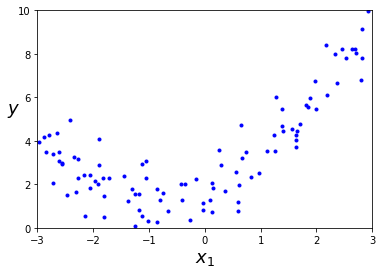

In [14]:
plt.plot(X,y,"b.")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18) # rotation은 글자가 돌아간다는 의미
plt.axis([-3,3,0,10])
plt.show()

In [15]:
# 모델 학습 (다항회귀모델)

In [16]:
from sklearn import preprocessing

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2,include_bias=False) 
# 다항회귀 항을 만든 것 입력값  x 를 다항식으로 변환한다. x→[1,x,x2,x3,⋯]
X_poly = poly_features.fit_transform(X)
X[0] # X의 독립변수의 첫번쨰 데이터 

array([-0.75275929])

In [18]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [22]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

In [23]:
# 학습 곡선: 학습 mse / 검증 mse 

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=10)
    train_errors, val_errors=[],[] # 데이터 초기화  
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m]) # 데이터 사이즈를 계속 늘려나감  
        y_train_predict = model.predict(X_train[:m]) # 학습 mse
        y_val_predict = model.predict(X_val) # 검증 mse
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    
    plt.plot(np.sqrt(train_errors),"r-+",linewidth=2,label="train")
    plt.plot(np.sqrt(val_errors),"b-",linewidth=3,label="val")
    plt.legend(loc="upper right",fontsize=14) # not shown in the book
    plt.xlabel("Training set size",fontsize=14) # not shown
    plt.ylabel("RMSE",fontsize=14) # not shown

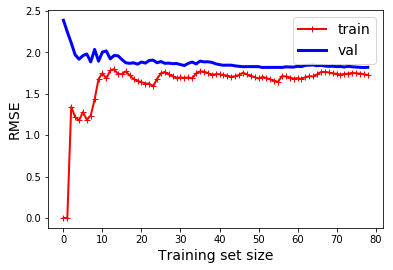

In [28]:
lin_reg=LinearRegression()
plot_learning_curves(lin_reg,X,y)
# 사이즈가 커질 수록 값이 비슷해진다. 
# 과적합이 되지 않았다는 이야기 

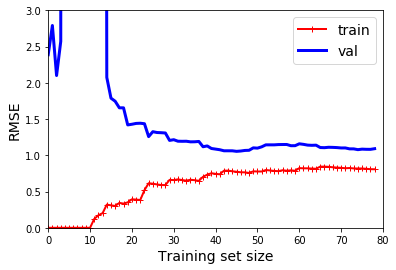

In [30]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # 책에는 빠짐
#save_fig("learning_curves_plot")  # 책에는 빠짐
plt.show()                        # 책에는 빠짐
# 과적합 

In [31]:
# 과적합을 막으려면 데이터의 사이즈를 늘리는게 좋긴해
# 근데 데이터의 사이즈가 늘릴 수 없는 상황이면
# 과적합시키지 않는 모델을 사용하면 된다. 

In [32]:
# MSE = bias(편향)^2 + var # 서로 반비례 관계 
# 모델이 복잡하면 불안정하다 = 아웃라이어에 굉장히 민감 (과대적합)
# 모델이 단순하면 상대적으로 안정적 = 과대적합이 되지 않는다. 

In [33]:
# MSE + 복잡성 penalty(모델의 var를 낮춰준다)

## ppt 참고

MSE = bias(편향)^2 + var # 서로 반비례 관계 

- MSE: 모델의 성능지표 
- bias: 트레이닝 데이터에 대해서 잘 적합이 되었다는 의미 . training의 prediction이 정확하다. 모델이 복잡해질 수록 bias가 감소. 하지만 모델이 복잡해진다는 것은 오버피팅이 생김 (training 데이터에는 잘 적합이 되는데 새로운 데이터가 들어오면 모델이 또 그에 맞춰서 바뀐다. variance가 높아짐)
- var: 선형으로 했을 경우 오차가 상대적으로 심하게 나서 bias는 높아지지만 var 는 새로운 데이터가 와도 parameter값은 급격하게 바뀌지 않는다. 즉 var는 낮아진다. 

4.5에 나오는 내용은 

- bias를 증가시키고 var 는 감소시켜서 필요없는 다항식을 줄여준다. coefficient(계수)를 줄인다. 
- 다항식 같은 경우에 늘어나는 베타값에 대해서 penalty를 주는 것 = 규제가 있는 선형모델

### Shrinkage methods

The idea is to perform a linear regression, while regularizing or shrinking the coefficients 베타헷, toward 0. 

선형회귀분석을 할 때, 계수인 베타 값들을 정규화 시키거나 줄어들게 하면서 0과 가까운 값이 되도록 만드는 것을 말한다. (필요없는 계수 베타의 값을 의미없게 만들어버리는 것)

- 이건 bias는 늘어나게 하고, variance는 늘어나게 한다.
- test error를 줄게 하는게 최종적 목표

### Ridge regression

### 기본 지식 

OLS(Ordinary Least Squares)는 가장 기본적인 결정론적 선형 회귀 방법으로 잔차제곱합(RSS: Residual Sum of Squares)를 최소화하는 가중치 벡터(베타)를 행렬 미분으로 구하는 방법이다.

* 잔차제곱합(RSS: Residual Sum of Squares): Sum((실제 값에서 예측된 값을 뺀 것)**2) 


* 잔차제곱합(RSS: Residual Sum of Squares) = OLS(Ordinary Least Squares)의 목적함수

### Ridge regression 

릿지 회귀 분석에서는 

* Minimization(RSS+람다*베타제곱의 합)
* RSS의 기능: train data에 적합하게 만드는 것 
* 감마*베타제곱의 합의 기능: 패널티, 모델의 복잡성에 대한 패널티
* 모델을 복잡하게 만든 것과 복잡한 것에 대해 패널티를 주는 것. 서로 상충된 것들의 밸런스를 맞춰주는 것


* 람다의 값이 베타제곱의 합의 중요도를 나타냄

릿지 회귀 분석의 다른 목적

- 독립 변수 간의 상관관계가 높으면 다중공선성 문제가 생기기 때문에 이를 해결할 때도 릿지 회귀를 사용하기도 한다. 

### Ridge Regression Adds a Penalty on 베타

- 람다*베타제곱의 합 을 통해서 패널티를 주고
- 람다 값은 파라미터의 튠을 주는 것
- 람다 값은 베타 값을 0로 만들어 주는 역할 
- 람다 값이 커지면 베타가 0에 가까워지고
- 람다 값이 0이면 OLS를 얻게 된다

### Ridge regression

- 독립변수를 표준화 시켜야 함 무조건. 
- scale을 표준화 시켜야 한다. 
- scale이 표준화가 안되면 가지고 있는 값의 단위에 따라서 var(분산)이 확 늘어나고 coef는 줄어들게 된다. 그러면 0에 가까워진다. 그렇게 되면 중요한 변수들도 없애게 되는 현상이 생김

### Credit Data: Ridge Regression

- standard coefficients : 회귀 계수
- income, limit, rating, student = 독립변수
- 람다: 패널티 함수의 하이퍼 파라미터

### Why can shrinking towards zero be a good thing to do? 

- OLS 같은 경우에는 bias가 낮다. var가 높아진다. 
- highdimension data인 경우에 특히 오버피팅이 심하게 된다. 
- 이럴 때는 패널티 텀을 이용해 var변수를 줄여줘야 한다. 
- 그러면 당연히 bias가 올라간다. 하지만 var는 줄어든다. 

### Ridge regression Bias/Variance

Ridge regression 이 특히 필요할 때는 ***고차원 데이터*** 일 때, 가장 필요 ! while, p>n. 고차원 데이터는 OLS를 구할 때 문제가 생김. 그래서 이 때 대체로 쓰는게 Ridge regression

### selecting 람다 by cross-validation

람다는 하이퍼 파라미터이기 떄문에 그리드 서치 하거나 랜덤 서치 해서 값을 찾아준다. 

-----------------------------

### The Lasso

- Ridge 와 비슷
- Ridge는 variable selection이 제대로 안된다 이유는 베타 값이 0이 되야지 죽이는 건데 베타=0.00256인 경우, 0에 가깝긴 한데.. 필요한지 아닌지 해석이 불분명 하다 
- 결국 셀렉션이 안되고 variable을 다 넣게 된다. 
- 이렇게 되면 해석이 명확하지 않으니깐 0에 가까워지면 0으로 바꾸는게 lasso. 패널티 텀을 줄여준다. 

- Lasso: 베타의 절대값. ridge: 베타의 제곱값

### What's the Big Deal? 

- 장점: 패널티 텀을 바꿔주면서 수학적으로 의미없는 것들이 0로 죽여버린다. 그렇게 되면 상대적으로 모델이 심플해진다. 

### Ridge 보다는 Lasso가 variable selection하는 관점에서 더 효과적이다

- dual problem / primal problem 

### When is the lasso better than ridge

모델을 잘 이해하기 위해서는 시뮬레이션을 해라

1. 다항회귀식의 계수가 전부다 0이 아닌 경우(계수가 모두 의미가 있을 경우) Ridge인 경우가 더 좋다. 
2. 45개 중에 2개만 0이 아닌 경우(쓸모없는 것들이 많은 경우), lasso를 쓰는게 좋다. 